In [1]:
import os
import sys

# --- Ensure project root is visible to Python ---
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"✅ Project root added to sys.path:\n{project_root}")


✅ Project root added to sys.path:
C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting


[config] Project root: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting
[config] Data path: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\candles\train_sample.csv
[config] Plots directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\plots
[config] Logs directory: C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\logs
[config] Default EGARCH params -> p=1, o=1, q=1, dist=t

══════════════════════════════════════════════════════════════════════
                 Loading Model and Out-of-Sample Data                 
══════════════════════════════════════════════════════════════════════

✅ Loaded trained EGARCH model from C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\data\egarch_model.pkl
✅ Loaded out-of-sample data (8928 rows)

══════════════════════════════════════════════════════════════════════
               Starting Forecasting (horizon=12 steps)                
════════════════════════════════════════════

C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\src\feature_engineering.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["log_return"].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\GitHubRepo\data-science\projects\ETH-volitality-fotecasting\src\evaluation.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  omega =

μ=0.000010, σ=0.002336, kurtosis=7.990
 ω=-0.069115, α=0.231495, γ=-0.000007, β=0.979611
 Last σ=0.204187, horizon=12 steps

 Progress:   446/8927  (  5.0%)
 Progress:   892/8927  ( 10.0%)
 Progress:  1338/8927  ( 15.0%)
 Progress:  1784/8927  ( 20.0%)
 Progress:  2230/8927  ( 25.0%)
 Progress:  2676/8927  ( 30.0%)
 Progress:  3122/8927  ( 35.0%)
 Progress:  3568/8927  ( 40.0%)
 Progress:  4014/8927  ( 45.0%)
 Progress:  4460/8927  ( 50.0%)
 Progress:  4906/8927  ( 55.0%)
 Progress:  5352/8927  ( 60.0%)
 Progress:  5798/8927  ( 64.9%)
 Progress:  6244/8927  ( 69.9%)
 Progress:  6690/8927  ( 74.9%)
 Progress:  7136/8927  ( 79.9%)
 Progress:  7582/8927  ( 84.9%)
 Progress:  8028/8927  ( 89.9%)
 Progress:  8474/8927  ( 94.9%)
 Progress:  8920/8927  ( 99.9%)
 Progress:  8927/8927  (100.0%)

✅ Deterministic 12-step forecasts completed (8927 points).

══════════════════════════════════════════════════════════════════════
        Plotting EGARCH vs Realized Volatility (Out-of-Sample)        


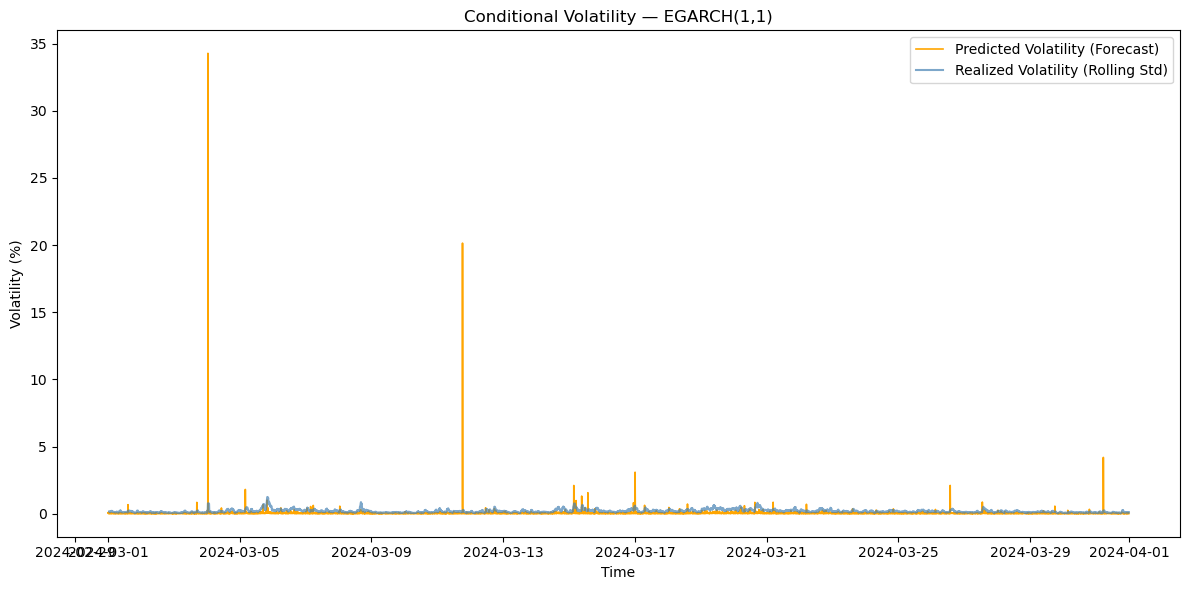


══════════════════════════════════════════════════════════════════════
             3-Day Volatility Comparison (Out-of-Sample)              
══════════════════════════════════════════════════════════════════════


══════════════════════════════════════════════════════════════════════
          3-Day Volatility Comparison Table (Out-of-Sample)           
══════════════════════════════════════════════════════════════════════

Period           Predicted    Realized     AbsDiff      Corr
------------------------------------------------------------
2024-03-01           0.023       0.124       0.100     0.222
2024-03-04           0.094       0.292       0.199     0.122
2024-03-07           0.032       0.181       0.149     0.342
2024-03-10           0.055       0.167       0.111     0.053
2024-03-13           0.044       0.227       0.183     0.283
2024-03-16           0.042       0.220       0.178     0.264
2024-03-19           0.053       0.326       0.273     0.226
2024-03-22           

,predicted_vol,realized_vol,diff_abs,corr
open_time,,,,
2024-03-01,0.023466,0.123673,0.100207,0.222184
2024-03-04,0.093735,0.292383,0.198648,0.122451
2024-03-07,0.031637,0.181078,0.149441,0.341861
2024-03-10,0.055487,0.166531,0.111045,0.053443
2024-03-13,0.044002,0.227272,0.183270,0.283326


In [2]:
# === Setup project imports ===
from src.evaluation import evaluate_egarch_out_of_sample

# === Run evaluation ===
weekly_df = evaluate_egarch_out_of_sample()
weekly_df.head()



z



**Notatka – analiza wyników EGARCH (out-of-sample)**

Model EGARCH(1,1) na danych testowych wykazał bardzo niską korelację (~0.2) między prognozowaną a zrealizowaną zmiennością, mimo że wizualnie serie są zbliżone. Przyczyną są pojedyncze skrajne wartości (outliery), które znacząco zniekształcają metryki korelacji i błędu.

Wyniki mogą również sugerować **możliwy leakage w zbiorze treningowym** – model mógł nieświadomie korzystać z danych z przyszłości (np. przez overlap rolling window lub niewłaściwy podział czasowy).

**Kroki do wykonania jutro:**

* Zweryfikować, czy dane treningowe i testowe są w pełni rozdzielone czasowo.
* Sprawdzić, czy rolling features nie sięgają do okresu testowego.
* Rozważyć **usunięcie lub winsoryzację 1% skrajnych obserwacji** (outlierów w predicted_vol).
* Ponownie przeliczyć korelację (Pearson i Spearman) po oczyszczeniu danych.
